In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn import over_sampling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### **Prepare The Dataset**

#### Read The csv Files

In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ridwanakmal","key":"d47613ff7b8c36d503860ad5aa867027"}'}

In [5]:
!mkdir -p ~/.kaggle                                               
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d dwiwahyuef/home-credit-indonesia-default-risk

100% 686M/688M [00:23<00:00, 29.8MB/s]
100% 688M/688M [00:23<00:00, 31.2MB/s]


In [7]:
!unzip '/content/home-credit-indonesia-default-risk.zip' -d '/content/hcidata'

Archive:  /content/home-credit-indonesia-default-risk.zip
  inflating: /content/hcidata/HomeCredit_columns_description.csv  
  inflating: /content/hcidata/POS_CASH_balance.csv  
  inflating: /content/hcidata/application_test.csv  
  inflating: /content/hcidata/application_train.csv  
  inflating: /content/hcidata/bureau.csv  
  inflating: /content/hcidata/bureau_balance.csv  
  inflating: /content/hcidata/credit_card_balance.csv  
  inflating: /content/hcidata/installments_payments.csv  
  inflating: /content/hcidata/previous_application.csv  
  inflating: /content/hcidata/sample_submission.csv  


In [8]:
# SEP THE DATA
main = pd.read_csv("/content/hcidata/application_train.csv")
test = pd.read_csv("/content/hcidata/application_test.csv")
bureau = pd.read_csv("/content/hcidata/bureau.csv")
bureau_balance = pd.read_csv("/content/hcidata/bureau_balance.csv")
credit_card_balance = pd.read_csv("/content/hcidata/credit_card_balance.csv")
installments_payments = pd.read_csv("/content/hcidata/installments_payments.csv")
previous_application = pd.read_csv("/content/hcidata/previous_application.csv")
POS_CASH_balance = pd.read_csv("/content/hcidata/POS_CASH_balance.csv")

In [9]:
main.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


total pinjaman home credit sebelumnya dari client

In [11]:
prev_app = previous_application.groupby(['SK_ID_CURR'])['SK_ID_CURR'].agg(['count']).reset_index()
prev_app.columns = ['SK_ID_CURR','TOTAL_PREV_APP']
prev_app

,SK_ID_CURR,TOTAL_PREV_APP
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2
...,...,...
338852,456251,1
338853,456252,1
338854,456253,2
338855,456254,2


 total kredit yang dimiliki clien dari biro kredit

In [12]:
bureau_cred = bureau.groupby(['SK_ID_CURR'])['SK_ID_CURR'].agg(['count']).reset_index()
bureau_cred.columns = ['SK_ID_CURR','TOTAL_BUREAU_LOAN']
bureau_cred

,SK_ID_CURR,TOTAL_BUREAU_LOAN
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3
...,...,...
305806,456249,13
305807,456250,3
305808,456253,4
305809,456254,1


### **Exploratory Data Analysis**
- Missing Value
- Redundant Data
- Column Data Type
- Basic Info of The Clients
- Feature v Target Distribution


In [13]:
df = (main.merge(prev_app, how='left', on='SK_ID_CURR')).merge(bureau_cred, how='left', on='SK_ID_CURR')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


#### Missing Value

In [14]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).reset_index()
missing_data.loc[missing_data['Percent'] >60]

,index,Total,Percent
0,COMMONAREA_MODE,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MEDI,214865,69.872297
3,NONLIVINGAPARTMENTS_AVG,213514,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MEDI,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MODE,210199,68.354953


In [15]:
(missing_data.loc[missing_data['Percent'] >0]).shape

(69, 3)

- Dataframe terdiri 124 columns. Dengan  69 columns mempunyai missing values.
- Selanjutnya kita akan mendrop kolom dengan missing value lebih dari 60%

#### Data Redundant

In [16]:
df.duplicated().sum()

0

There is no redundant data

#### Column Data Type

In [17]:
df.dtypes.value_counts()

float64    67
int64      41
object     16
dtype: int64

In [18]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Kebanyakan dari fitur kategori(object) pada dataset memiliki nilai unique yang tidak banyak, untuk berikutnya akan dilakukan encode 

#### Feature Target Distribution


- 1: client yang memiliki kesulitan pembayaran
- 0: pembayaran pinjaman dilakukan tepat waktu

In [19]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

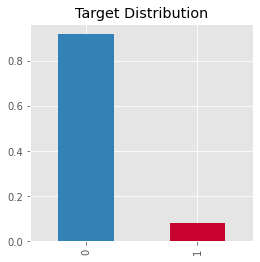

In [20]:
df['TARGET'].value_counts(normalize=True).plot.bar(figsize=(4,4), title= 'Target Distribution', color=['#3282B8','#c8012e'])
plt.show()

Dari visualisasi dapat kita lihat permaslahan adalah data yang tidak balance. Dimana banyak sekali data dengan pembayaran pinjaman yang dilakukan tepat waktu dibanding dengan pinjaman yang tidak dilunasi dengan tepat waktu.

#### Basic Info of The Clients

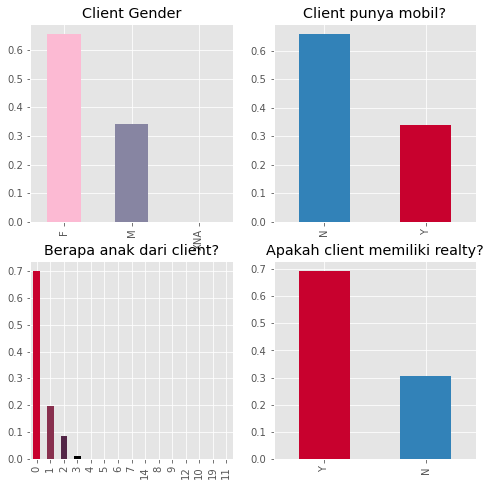

In [21]:
plt.figure(1)
plt.subplot(221)
df['CODE_GENDER'].value_counts(normalize=True).plot.bar(figsize=(8,8), title= 'Client Gender', color=['#FCBAD3','#8785A2'])
plt.subplot(222)
df['FLAG_OWN_CAR'].value_counts(normalize=True).plot.bar(title= 'Client punya mobil?', color=['#3282B8','#c8012e'])
plt.subplot(223)
df['CNT_CHILDREN'].value_counts(normalize=True).plot.bar(title= 'Berapa anak dari client?', color=['#c8012e','#88304E','#522546','black'])
plt.subplot(224)
df['FLAG_OWN_REALTY'].value_counts(normalize=True).plot.bar(figsize=(8,8), title= 'Apakah client memiliki realty?', color=['#c8012e','#3282B8'])

plt.show()

- Sebagian besar dari client adalah wanita dan tidak memiliki anak
- Sebagian besar dari clients memiliki realty tetapi tidak memiliki mobil

In [22]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [23]:
df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [24]:
df['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [25]:
df['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

#### External Source

##### EXT_SOURCE 1

In [26]:
df['EXT_SOURCE_1'].describe()

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

In [27]:
data_EX1 = df[['TARGET', 'EXT_SOURCE_1']]
data_EX1['EXT_SOURCE_1_GROUP'] = pd.cut(data_EX1['EXT_SOURCE_1'], bins = np.linspace(0, 1, num=6))
data_EX1 = (data_EX1.groupby(['EXT_SOURCE_1_GROUP']).mean()).sort_values('TARGET')
data_EX1

<ipython-input-27-569b9d521daf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_EX1['EXT_SOURCE_1_GROUP'] = pd.cut(data_EX1['EXT_SOURCE_1'], bins = np.linspace(0, 1, num=6))


,TARGET,EXT_SOURCE_1
EXT_SOURCE_1_GROUP,,
"(0.8, 1.0]",0.024551,0.846599
"(0.6, 0.8]",0.041637,0.696240
"(0.4, 0.6]",0.064229,0.500625
"(0.2, 0.4]",0.103121,0.305683
"(0.0, 0.2]",0.182317,0.141402


<BarContainer object of 5 artists>

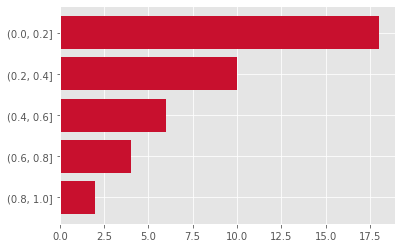

In [28]:
plt.barh(data_EX1.index.astype(str), round(100*data_EX1['TARGET']), color='#c8102e')

##### EXT_SOURCE 2

In [29]:
df['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [30]:
data_EX2 = df[['TARGET', 'EXT_SOURCE_2']]
data_EX2['EXT_SOURCE_2_GROUP'] = pd.cut(data_EX2['EXT_SOURCE_2'], bins = np.linspace(0, 1, num=6))
data_EX2 = (data_EX2.groupby(['EXT_SOURCE_2_GROUP']).mean()).sort_values('TARGET')
data_EX2

<ipython-input-30-dd9f62596a60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_EX2['EXT_SOURCE_2_GROUP'] = pd.cut(data_EX2['EXT_SOURCE_2'], bins = np.linspace(0, 1, num=6))


,TARGET,EXT_SOURCE_2
EXT_SOURCE_2_GROUP,,
"(0.8, 1.0]",0.017575,0.807577
"(0.6, 0.8]",0.045715,0.681445
"(0.4, 0.6]",0.077942,0.515838
"(0.2, 0.4]",0.116156,0.306879
"(0.0, 0.2]",0.188444,0.113479


<BarContainer object of 5 artists>

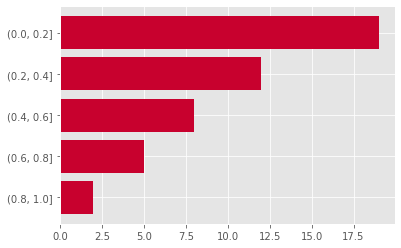

In [31]:
plt.barh(data_EX2.index.astype(str), round(100*data_EX2['TARGET']), color='#c8012e')

##### EXT_SOURCE 3

In [32]:
df['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [33]:
data_EX3 = df[['TARGET', 'EXT_SOURCE_3']]
data_EX3['EXT_SOURCE_3_GROUP'] = pd.cut(data_EX3['EXT_SOURCE_3'], bins = np.linspace(0, 1, num=6))
data_EX3 = (data_EX3.groupby(['EXT_SOURCE_3_GROUP']).mean()).sort_values('TARGET')
data_EX3

<ipython-input-33-6a163081538b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_EX3['EXT_SOURCE_3_GROUP'] = pd.cut(data_EX3['EXT_SOURCE_3'], bins = np.linspace(0, 1, num=6))


,TARGET,EXT_SOURCE_3
EXT_SOURCE_3_GROUP,,
"(0.8, 1.0]",0.028729,0.825140
"(0.6, 0.8]",0.039989,0.691383
"(0.4, 0.6]",0.065192,0.506095
"(0.2, 0.4]",0.117779,0.311368
"(0.0, 0.2]",0.209439,0.128083


<BarContainer object of 5 artists>

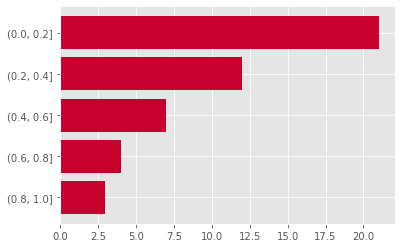

In [34]:
plt.barh(data_EX3.index.astype(str), round(100*data_EX3['TARGET']), color='#c8012e')

### **Data Preprocessing Data Training**
- Feature Engineering
- Replace XNA values with NaN
- Missing Values (Drop and Imputation)
- Scaling Numerical Features
- Feature Encoding

In [35]:
df = (main.merge(prev_app, how='left', on='SK_ID_CURR')).merge(bureau_cred, how='left', on='SK_ID_CURR')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [36]:
rt = df.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,0,10
1,Commercial associate,0,66257
2,Commercial associate,1,5360
3,Maternity leave,0,3
4,Maternity leave,1,2
5,Pensioner,0,52380
6,Pensioner,1,2982
7,State servant,0,20454
8,State servant,1,1249
9,Student,0,18


In [37]:
df[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


In [38]:
ot = df.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Occupation Type')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Occupation Type


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,0,9339
1,Accountants,1,474
2,Cleaning staff,0,4206
3,Cleaning staff,1,447
4,Cooking staff,0,5325
5,Cooking staff,1,621
6,Core staff,0,25832
7,Core staff,1,1738
8,Drivers,0,16496
9,Drivers,1,2107


In [39]:
df[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


#### Feature Engineering

1. **Converting DAYS_BIRTH to years to get client age**

    angka di DAYS_BIRTH negatif karena dicatat relatif thd pinjaman saat ini. Untuk melihat umur kita akan membagi dengan negatif dari jumlah hari dalam setahun

In [40]:
df['AGE'] = df['DAYS_BIRTH']/-365
df.drop(columns='DAYS_BIRTH', inplace=True)

In [41]:
data_age = df[['TARGET', 'AGE']]
data_age['AGE_GROUP'] = pd.cut(data_age['AGE'], bins = np.linspace(20, 70, num=6))
data_age = (data_age.groupby(['AGE_GROUP']).mean()).sort_values('TARGET')
data_age

<ipython-input-41-747ae153e852>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age['AGE_GROUP'] = pd.cut(data_age['AGE'], bins = np.linspace(20, 70, num=6))


,TARGET,AGE
AGE_GROUP,,
"(60.0, 70.0]",0.049214,63.355933
"(50.0, 60.0]",0.061297,54.976575
"(40.0, 50.0]",0.076508,44.756079
"(30.0, 40.0]",0.095835,35.123197
"(20.0, 30.0]",0.114569,26.622041


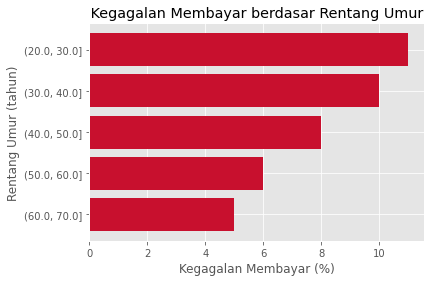

In [42]:
plt.barh(data_age.index.astype(str), round(100*data_age['TARGET']), color='#c8102e')

plt.ylabel('Rentang Umur (tahun)')
plt.xlabel('Kegagalan Membayar (%)')
plt.title(' Kegagalan Membayar berdasar Rentang Umur ');
plt.show()

Klien yang lebih muda lebih cenderung tidak membayar kembali pinjaman. Tingkat gagal bayar bahkan di atas 10%, Ini informasi yang penting dimana dapat langsung digunakan oleh bank karena klien yang lebih muda cenderung tidak dapat melunasi pinjaman mereka harus diberi panduan atau tips perencenaan pengelolaan keuangan.

2. **Converting DAYS_EMPLOYED to years**

DAYS_EMPLOYED: Berapa hari sebelum client memulai pekerjaan

In [43]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED']/-365
df.drop(columns='DAYS_EMPLOYED', inplace=True)

df['YEARS_EMPLOYED'].describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

kocak disini nilai dari minimum sampai 1000 tahun

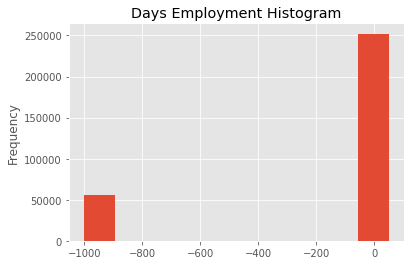

In [44]:
df['YEARS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');

kita akan replace nilai yang salah tadi dengan memanfaatkan np.nan

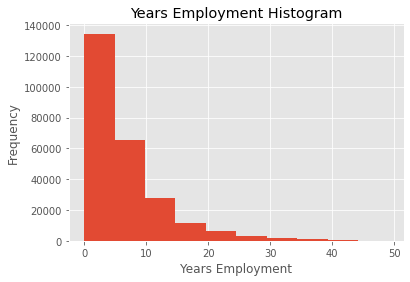

In [45]:
df['YEARS_EMPLOYED'].replace({df['YEARS_EMPLOYED'].min(): np.nan}, inplace=True)
df['YEARS_EMPLOYED'].plot.hist(title = 'Years Employment Histogram');
plt.xlabel('Years Employment');

In [46]:
data_employed = df[['TARGET', 'YEARS_EMPLOYED','AGE']]
data_employed['YEARS_EMPLOYED_GROUP'] = pd.cut(data_employed['YEARS_EMPLOYED'], bins = np.linspace(0, 50, num=6))
data_employed = ((data_employed.groupby(['YEARS_EMPLOYED_GROUP']).mean())).sort_values('TARGET')
data_employed

<ipython-input-46-9077b9324d7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_employed['YEARS_EMPLOYED_GROUP'] = pd.cut(data_employed['YEARS_EMPLOYED'], bins = np.linspace(0, 50, num=6))


,TARGET,YEARS_EMPLOYED,AGE
YEARS_EMPLOYED_GROUP,,,
"(40.0, 50.0]",0.004274,42.419588,62.777719
"(30.0, 40.0]",0.034645,33.725897,55.769764
"(20.0, 30.0]",0.044917,23.945354,49.161998
"(10.0, 20.0]",0.055133,13.662366,44.636523
"(0.0, 10.0]",0.095392,3.928111,39.017162


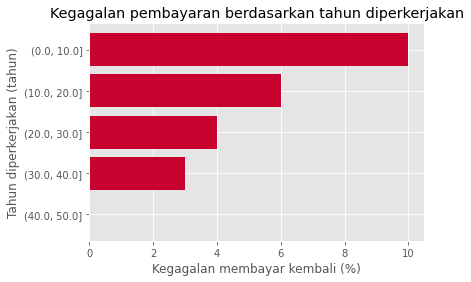

In [47]:
plt.barh(data_employed.index.astype(str), round(100*data_employed['TARGET']), color='#c8012e')

plt.ylabel('Tahun diperkerjakan (tahun)')
plt.xlabel('Kegagalan membayar kembali (%)')
plt.title('Kegagalan pembayaran berdasarkan tahun diperkerjakan');
plt.show()

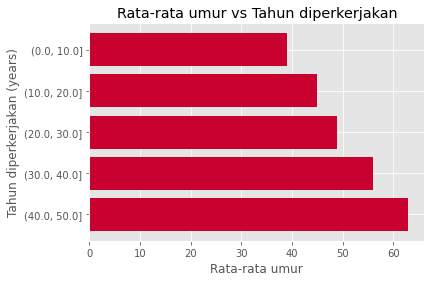

In [48]:
plt.barh(data_employed.index.astype(str), round(data_employed['AGE']), color='#c8012e')

plt.ylabel('Tahun diperkerjakan (years)')
plt.xlabel('Rata-rata umur')
plt.title('Rata-rata umur vs Tahun diperkerjakan');
plt.show()

3. **Converting DAYS_REGISTRATION to years**

DAYS_REGISTRATION: How many days before the application did client change his registration

In [49]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION']/-365
df.drop(columns='DAYS_REGISTRATION', inplace=True)

df['YEARS_REGISTRATION'].describe()

count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: YEARS_REGISTRATION, dtype: float64

In [50]:
data_regist = df[['TARGET', 'YEARS_REGISTRATION']]
data_regist['YEARS_REGISTRATION_GROUP'] = pd.cut(data_regist['YEARS_REGISTRATION'], bins = np.linspace(0, 70, num=8))
data_regist = (data_regist.groupby(['YEARS_REGISTRATION_GROUP']).mean())
data_regist

<ipython-input-50-444f02eb4bd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_regist['YEARS_REGISTRATION_GROUP'] = pd.cut(data_regist['YEARS_REGISTRATION'], bins = np.linspace(0, 70, num=8))


,TARGET,YEARS_REGISTRATION
YEARS_REGISTRATION_GROUP,,
"(0.0, 10.0]",0.089793,4.554976
"(10.0, 20.0]",0.083164,14.552255
"(20.0, 30.0]",0.066114,24.388090
"(30.0, 40.0]",0.056592,33.759017
"(40.0, 50.0]",0.038159,42.643739
"(50.0, 60.0]",0.042254,53.426973
"(60.0, 70.0]",0.111111,63.092846


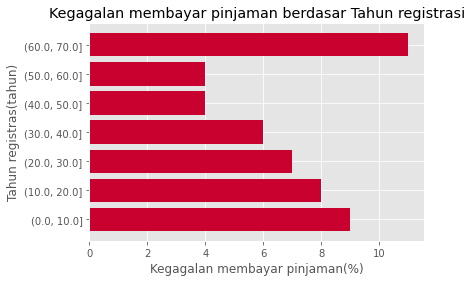

In [51]:
plt.barh(data_regist.index.astype(str), round(100*data_regist['TARGET']), color='#c8012e')

plt.ylabel('Tahun registras(tahun)')
plt.xlabel('Kegagalan membayar pinjaman(%)')
plt.title('Kegagalan membayar pinjaman berdasar Tahun registrasi');
plt.show()

4. **Converting DAYS_ID_PUBLISH to years**

DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan

In [52]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH']/-365
df.drop(columns='DAYS_ID_PUBLISH', inplace=True)

df['YEARS_ID_PUBLISH'].describe()

count    307511.000000
mean          8.203294
std           4.135481
min          -0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: YEARS_ID_PUBLISH, dtype: float64

In [53]:
data_id_publish = df[['TARGET', 'YEARS_ID_PUBLISH']]
data_id_publish['YEARS_ID_PUBLISH_GROUP'] = pd.cut(data_id_publish['YEARS_ID_PUBLISH'], bins = np.linspace(0, 20, num=5))
data_id_publish = (data_id_publish.groupby(['YEARS_ID_PUBLISH_GROUP']).mean()).sort_values('TARGET')
data_id_publish

<ipython-input-53-aff4ca95f585>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_id_publish['YEARS_ID_PUBLISH_GROUP'] = pd.cut(data_id_publish['YEARS_ID_PUBLISH'], bins = np.linspace(0, 20, num=5))


,TARGET,YEARS_ID_PUBLISH
YEARS_ID_PUBLISH_GROUP,,
"(15.0, 20.0]",0.055633,15.727328
"(10.0, 15.0]",0.067253,12.063096
"(5.0, 10.0]",0.084554,7.541837
"(0.0, 5.0]",0.098703,2.550191


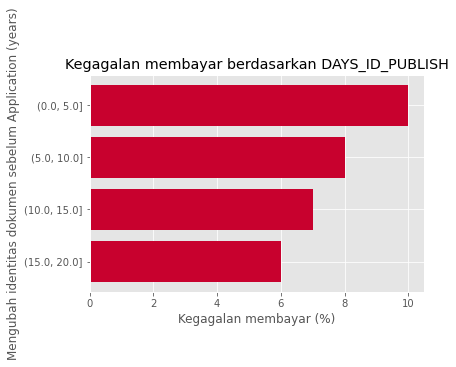

In [54]:
plt.barh(data_id_publish.index.astype(str), round(100*data_id_publish['TARGET']), color='#c8012e')

plt.ylabel('Mengubah identitas dokumen sebelum Application (years)')
plt.xlabel('Kegagalan membayar (%)')
plt.title('Kegagalan membayar berdasarkan DAYS_ID_PUBLISH');
plt.show()

5. **Number of documents provided by a customer**

In [55]:
regex = re.compile('FLAG_DOCUMENT_')
col = [i for i in df.columns if re.match(regex, i)]

In [56]:
df['TOTAL_DOCUMENT'] = df['FLAG_DOCUMENT_2'] + df['FLAG_DOCUMENT_3'] + df['FLAG_DOCUMENT_4'] + df['FLAG_DOCUMENT_5'] + df['FLAG_DOCUMENT_6'] + df['FLAG_DOCUMENT_7'] + df['FLAG_DOCUMENT_8'] + df['FLAG_DOCUMENT_9'] + df['FLAG_DOCUMENT_10'] + df['FLAG_DOCUMENT_11'] + df['FLAG_DOCUMENT_12'] + df['FLAG_DOCUMENT_13'] + df['FLAG_DOCUMENT_14'] + df['FLAG_DOCUMENT_15'] + df['FLAG_DOCUMENT_16'] + df['FLAG_DOCUMENT_17'] + df['FLAG_DOCUMENT_18'] + df['FLAG_DOCUMENT_19'] + df['FLAG_DOCUMENT_20'] + df['FLAG_DOCUMENT_21'] 

In [57]:
df.drop(columns = [i for i in df.columns if re.match(regex, i)], inplace=True)

In [58]:
df['TOTAL_DOCUMENT'].value_counts()

1    270056
0     29549
2      7742
3       163
4         1
Name: TOTAL_DOCUMENT, dtype: int64

In [59]:
doc_list = []
for index, column in df.iterrows():
    if column['TOTAL_DOCUMENT'] >= 1:
        doc = 1
    else:
        doc = 0
    doc_list.append(doc)

df['DOC_PROVIDED'] = doc_list

In [60]:
doc_data = df.groupby(['DOC_PROVIDED'])['TARGET'].mean().reset_index()
doc_data

,DOC_PROVIDED,TARGET
0,0,0.055230
1,1,0.083439


In [61]:
doc_data['DOC_PROVIDED'] = doc_data['DOC_PROVIDED'].astype('int')

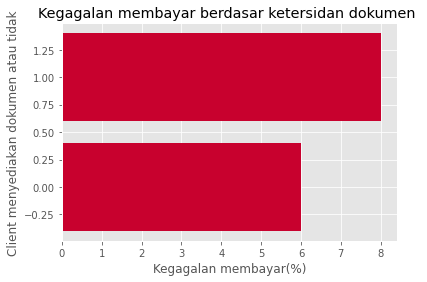

In [62]:
plt.barh(range(0,2), round(100*doc_data['TARGET']), color='#c8012e')

plt.ylabel('Client menyediakan dokumen atau tidak')
plt.xlabel('Kegagalan membayar(%)')
plt.title('Kegagalan membayar berdasar ketersidan dokumen ')
plt.show()

6. **Income Annuity Percentage** 

In [63]:
df['INCOME_ANNUITY_PERCENT'] = (df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL'])*100

In [64]:
df['INCOME_ANNUITY_PERCENT'].describe()

count    307499.000000
mean         18.093001
std           9.457380
min           0.022388
25%          11.478182
50%          16.283333
75%          22.906667
max         187.596491
Name: INCOME_ANNUITY_PERCENT, dtype: float64

In [65]:
income_list = []
for index, column in df.iterrows():
    if column['INCOME_ANNUITY_PERCENT'] > 150:
        income = 150
    else:
        income = column['INCOME_ANNUITY_PERCENT']
    income_list.append(income)

df['INCOME_ANNUITY_PERCENT_NEW'] = income_list

In [66]:
income_annuity = df[['TARGET', 'INCOME_ANNUITY_PERCENT_NEW']]
income_annuity['INCOME_ANNUITY_PERCENT_NEW_GROUP'] = pd.cut(income_annuity['INCOME_ANNUITY_PERCENT_NEW'], bins = np.linspace(0, 200, num=5))
income_annuity = (income_annuity.groupby(['INCOME_ANNUITY_PERCENT_NEW_GROUP']).mean()).sort_values('TARGET')
income_annuity

<ipython-input-66-49cbeb1e7fb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_annuity['INCOME_ANNUITY_PERCENT_NEW_GROUP'] = pd.cut(income_annuity['INCOME_ANNUITY_PERCENT_NEW'], bins = np.linspace(0, 200, num=5))


,TARGET,INCOME_ANNUITY_PERCENT_NEW
INCOME_ANNUITY_PERCENT_NEW_GROUP,,
"(50.0, 100.0]",0.074489,59.974851
"(0.0, 50.0]",0.080775,17.739247
"(100.0, 150.0]",0.151515,116.888560
"(150.0, 200.0]",NaN,NaN


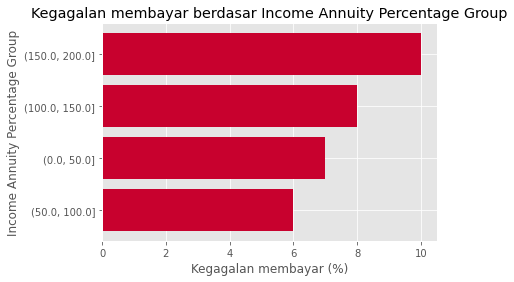

In [67]:
plt.barh(income_annuity.index.astype(str), round(100*data_id_publish['TARGET']), color='#c8012e')

plt.ylabel('Income Annuity Percentage Group')
plt.xlabel('Kegagalan membayar (%)')
plt.title('Kegagalan membayar berdasar Income Annuity Percentage Group');
plt.show()

7. **Earned Income Tax Credit (EITC)**

EITC equals a fixed percentage (the “credit rate”) of earned income until the credit reaches its maximum amount.

Source: https://sgp.fas.org/crs/misc/R43805.pdf

In [68]:
df['EITC'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

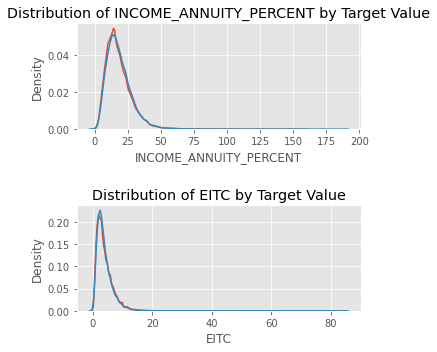

In [69]:
plt.figure(figsize = (5,5))
# iterate through the new features
for i, feature in enumerate(['INCOME_ANNUITY_PERCENT', 'EITC']):
    
    # create a new subplot for each source
    plt.subplot(2, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [70]:
pd.set_option('display.max_columns', None)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,DOC_PROVIDED,INCOME_ANNUITY_PERCENT,INCOME_ANNUITY_PERCENT_NEW,EITC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,25.920548,1.745205,9.994521,5.808219,1,1,12.197778,12.197778,2.007889
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,45.931507,3.254795,3.249315,0.797260,1,1,13.221667,13.221667,4.790750
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,52.180822,0.616438,11.671233,6.934247,0,0,10.000000,10.000000,2.000000
3,100006,0,Cash loa

#### Replace XNA values with NaN

‘XNA’ in the above output might be because of the incorrect information while data entry.

In [71]:
for col in df.select_dtypes(include = ["object"]).columns:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Va

Replacing XNA in columns GENDER and ORGANIZATION_TYPE to NaN

In [72]:
df.CODE_GENDER.replace("XNA", np.nan, inplace=True)
df.ORGANIZATION_TYPE.replace("XNA", np.nan, inplace=True)

In [73]:
df.shape

(307511, 109)

In [74]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).reset_index()
missing_data.loc[missing_data['Percent'] >60]

,index,Total,Percent
0,COMMONAREA_MODE,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MEDI,214865,69.872297
3,NONLIVINGAPARTMENTS_AVG,213514,69.432963
4,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
5,NONLIVINGAPARTMENTS_MODE,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MEDI,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MODE,210199,68.354953


#### Menghapus kolom dengan tingkat missing lebih dari 60%

In [75]:
df.drop(columns=list(missing_data['index'].loc[missing_data['Percent'] >60]),inplace=True)
df.shape

(307511, 92)

In [76]:
pd.set_option("max_columns", None)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,DOC_PROVIDED,INCOME_ANNUITY_PERCENT,INCOME_ANNUITY_PERCENT_NEW,EITC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.00,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,25.920548,1.745205,9.994521,5.808219,1,1,12.197778,12.197778,2.007889
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.01,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,45.931507,3.254795,3.249315,0.797260,1,1,13.221667,13.221667,4.790750
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,52.180822,0.616438,11.671233,6.934247,0,0,10.000000,10.000000,2.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,52.068493,8.326027,26.939726,6.676712,1,1,21.990000,21.990000,2.316167
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartm

#### Missing Value Imputation

In [77]:
null = df.isnull().sum().reset_index()
null_table = null.loc[null[0] > 0]
null_table.shape

(57, 2)

57 columns have missing value

In [78]:
pd.set_option("max_columns", None)
data_null = df[null_table['index'].tolist()]
data_null

,CODE_GENDER,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,YEARS_EMPLOYED,INCOME_ANNUITY_PERCENT,INCOME_ANNUITY_PERCENT_NEW
0,M,24700.5,351000.0,Unaccompanied,Laborers,1.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,1.745205,12.197778,12.197778
1,F,35698.5,1129500.0,Family,Core staff,2.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,3.254795,13.221667,13.221667
2,M,6750.0,135000.0,Unaccompanied,Laborers,1.0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.616438,10.000000,10.000000
3,F,29686.5,297000.0,Unaccompanied,Laborers,2.0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,8.326027,21.990000,21.990000
4,M,21865.5,513000.0,Unaccompanied,Core staff,1.0,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,8.323288,17.996296,17.996296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,M,27558.0,225000.0,Unaccompanied,Sales staff,1.0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.22,0.1034,0.6042,0.0594,0.1965,0.1095,0.1008,0.0172,0.9782,0.0806,0.0345,0.4583,0.0094,0.0853,0.0125,0.2040,0.0887,0.9876,0.22,0.1034,0.6042,0.0605,0.2001,0.1118,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.646575,17.497143,17.497143
307507,F,12001.5,225000.0,Unaccompanied,NaN,1.0,NaN,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.00,0.1034,0.0833,0.0579,0.0257,0.0000,0.0252,0.0451,0.9727,0.0000,0.1034,0.0833,0.0592,0.0267,0.0000,0.0250,0.0435,0.9727,0.00,0.1034,0.0833,0.0589,0.0261,0.0000,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,16.668750,16.668750
307508,F,29979.0,585000.0,Unaccompanied,Managers,1.0,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.00,0.2069,0.1667,NaN,0.9279,0.0000,0.1050,0.0894,0.9816,0.0000,0.2069,0.1667,NaN,0.9667,0.0000,0.1041,0.0862,0.9816,0.00,0.2069,0.1667,NaN,0.9445,0.0000,block of flats,0.7970,Panel,No,6

In [79]:
data_null.select_dtypes(exclude = ["object"] ).shape[1]

50

In [80]:
data_null.select_dtypes(include = ["object"] ).shape[1]

7

### Imputation pada kolom numerikal & kategorikal

In [81]:
def miss_numerical(df):
    
    numerical_features = df.select_dtypes(exclude = ["object"] ).columns
    for f in numerical_features:
        df[f] = df[f].fillna(df[f].median())
    return df

def miss_categorical(df):
    
    categorical_features = df.select_dtypes(include = ["object"]).columns
    for f in categorical_features:
        df[f] = df[f].fillna(df[f].mode()[0])
    return df

def transform_feature(df):
    df = miss_numerical(df)
    df = miss_categorical(df)
    return df

df = transform_feature(df)
pd.set_option("max_columns", None)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,DOC_PROVIDED,INCOME_ANNUITY_PERCENT,INCOME_ANNUITY_PERCENT_NEW,EITC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,25.920548,1.745205,9.994521,5.808219,1,1,12.197778,12.197778,2.007889
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,45.931507,3.254795,3.249315,0.797260,1,1,13.221667,13.221667,4.790750
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,Panel,No,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,52.180822,0.616438,11.671233,6.934247,0,0,10.000000,10.000000,2.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.505998,0.650442,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,Panel,No,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,4.0,52.068493

In [82]:
null = df.isnull().sum().reset_index()
null_table = null.loc[null[0] > 0]
null_table.shape[0]

0

#### Scaling Numerical Features

In [83]:
def encoder(df):
    scaler = MinMaxScaler()
    numerical = df.select_dtypes(exclude = ["object"]).columns
    numerical1 = numerical[2:4]
    numerical2 = numerical[5:]
    numerical_all = numerical1 | numerical2
    features_transform = pd.DataFrame(data=df)
    features_transform[numerical_all] = scaler.fit_transform(df[numerical_all])
    display(features_transform.head(n = 5))
    return df

df = encoder(df)

<ipython-input-83-65d4be5326a2>:6: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  numerical_all = numerical1 | numerical2


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,DOC_PROVIDED,INCOME_ANNUITY_PERCENT,INCOME_ANNUITY_PERCENT_NEW,EITC
0,100002,1,Cash loans,M,N,Y,0.0,0.001512,406597.5,0.090032,0.077441,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.256321,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,WEDNESDAY,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,block of flats,0.0149,"Stone, brick",No,0.005747,0.058824,0.005814,0.083333,0.735788,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.060870,0.111161,0.035563,0.147860,0.294567,0.25,1.0,0.064910,0.081181,0.023640
1,100003,0,Cash loans,F,N,N,0.0,0.002089,1293502.5,0.132924,0.271605,Family,State servant,Higher education,Married,House / apartment,0.045016,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,0.052632,0.0,0.0,MONDAY,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,School,0.312933,0.727773,0.597163,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,block of flats,0.0714,Block,No,0.002874,0.000000,0.002907,0.000000,0.807083,0.0,0.0,0.0,0.0,0.0,0.00,0.027778,0.026087,0.522886,0.066324,0.048071,0.040434,0.25,1.0,0.070368,0.088008,0.056483
2,100004,0,Revolving loans,M,Y,Y,0.0,0.000358,135000.0,0.020025,0.023569,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.134897,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,MONDAY,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,Government,0.518318,0.650190,0.814130,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,Panel,No,0.000000,0.000000,0.000000,0.000000,0.810112,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.008696,0.651466,0.012561,0.172665,0.351674,0.00,0.0,0.053193,0.066527,0.023547
3,100006,0,Cash loans,F,N,Y,0.0,0.000935,312682.5,0.109477,0.063973,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.107023,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,0.052632,0.5,0.5,WEDNESDAY,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.518318,0.760751,0.597163,0.0876,

In [84]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,DOC_PROVIDED,INCOME_ANNUITY_PERCENT,INCOME_ANNUITY_PERCENT_NEW,EITC
0,100002,1,Cash loans,M,N,Y,0.0,0.001512,406597.5,0.090032,0.077441,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.256321,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,WEDNESDAY,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,block of flats,0.0149,"Stone, brick",No,0.005747,0.058824,0.005814,0.083333,0.735788,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.060870,0.111161,0.035563,0.147860,0.294567,0.25,1.0,0.064910,0.081181,0.023640
1,100003,0,Cash loans,F,N,N,0.0,0.002089,1293502.5,0.132924,0.271605,Family,State servant,Higher education,Married,House / apartment,0.045016,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,0.052632,0.0,0.0,MONDAY,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,School,0.312933,0.727773,0.597163,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,block of flats,0.0714,Block,No,0.002874,0.000000,0.002907,0.000000,0.807083,0.0,0.0,0.0,0.0,0.0,0.00,0.027778,0.026087,0.522886,0.066324,0.048071,0.040434,0.25,1.0,0.070368,0.088008,0.056483
2,100004,0,Revolving loans,M,Y,Y,0.0,0.000358,135000.0,0.020025,0.023569,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.134897,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,MONDAY,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,Government,0.518318,0.650190,0.814130,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,Panel,No,0.000000,0.000000,0.000000,0.000000,0.810112,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.008696,0.651466,0.012561,0.172665,0.351674,0.00,0.0,0.053193,0.066527,0.023547
3,100006,0,Cash loans,F,N,Y,0.0,0.000935,312682.5,0.109477,0.063973,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.107023,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,0.052632,0.5,0.5,WEDNESDAY,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.518318,0.760751,0.597163,0.0876,

In [85]:
scaler_AMT_CREDIT = MinMaxScaler()
scaler_AMT_CREDIT.fit(df['AMT_CREDIT'].values.reshape(len(df), 1))

df['AMT_CREDIT'] = scaler_AMT_CREDIT.transform(df['AMT_CREDIT'].values.reshape(len(df), 1))

In [86]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,DOC_PROVIDED,INCOME_ANNUITY_PERCENT,INCOME_ANNUITY_PERCENT_NEW,EITC
0,100002,1,Cash loans,M,N,Y,0.0,0.001512,0.090287,0.090032,0.077441,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.256321,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,WEDNESDAY,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,block of flats,0.0149,"Stone, brick",No,0.005747,0.058824,0.005814,0.083333,0.735788,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.060870,0.111161,0.035563,0.147860,0.294567,0.25,1.0,0.064910,0.081181,0.023640
1,100003,0,Cash loans,F,N,N,0.0,0.002089,0.311736,0.132924,0.271605,Family,State servant,Higher education,Married,House / apartment,0.045016,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,0.052632,0.0,0.0,MONDAY,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,School,0.312933,0.727773,0.597163,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,block of flats,0.0714,Block,No,0.002874,0.000000,0.002907,0.000000,0.807083,0.0,0.0,0.0,0.0,0.0,0.00,0.027778,0.026087,0.522886,0.066324,0.048071,0.040434,0.25,1.0,0.070368,0.088008,0.056483
2,100004,0,Revolving loans,M,Y,Y,0.0,0.000358,0.022472,0.020025,0.023569,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.134897,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,MONDAY,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,Government,0.518318,0.650190,0.814130,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,Panel,No,0.000000,0.000000,0.000000,0.000000,0.810112,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.008696,0.651466,0.012561,0.172665,0.351674,0.00,0.0,0.053193,0.066527,0.023547
3,100006,0,Cash loans,F,N,Y,0.0,0.000935,0.066837,0.109477,0.063973,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.107023,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,0.052632,0.5,0.5,WEDNESDAY,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.518318,0.760751,0.597163,0.0876,0

In [87]:
df.shape

(307511, 92)

#### Feature Encoding

Untuk variabel dengan tipe data object(categorical) kita akan melakukan label encoding di nilai unique = 2, dan melakukan one hot encoding di variabel >=2

In [88]:
df[df.select_dtypes(include = ["object"]).columns].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,block of flats,Panel,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,Panel,No
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,block of flats,Panel,No


In [89]:
for col in df.select_dtypes(include = ["object"]).columns:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Value count kolom NA

In [90]:
le = LabelEncoder()
le_count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])            
            le_count += 1
           
print('Total label encoded columns: %d' % le_count)

Total label encoded columns: 5


In [91]:
df.shape

(307511, 92)

In [92]:
le_count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) > 2:
            onehots = pd.get_dummies(df[col])
            df = df.join(onehots)
            df.drop(columns=col, inplace=True)
            le_count += 1
           
print('Total one hot encoded columns: %d' % le_count)

Total one hot encoded columns: 10


In [93]:
df.shape

(307511, 206)

In [94]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,DOC_PROVIDED,INCOME_ANNUITY_PERCENT,INCOME_ANNUITY_PERCENT_NEW,EITC,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,Advertising,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden
0,100002,1,0,1,0,1,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,0.0149,0,0.005747,0.058824,0.005814,0.083333,0.735788,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.060870,0.111161,0.035563,0.147860,0.294567,0.25,1.0,0.064910,0.081181,0.023640,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,100003,0,0,0,0,0,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,1.0,1.0,0.0,1.0,1.0,0.0,0.052632,0.0,0.0,0.478261,0.0,0.0,0.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 206 entries, SK_ID_CURR to Wooden
dtypes: float64(75), int64(7), uint8(124)
memory usage: 239.2 MB


In [96]:
df_train = df.iloc[:,1:]

In [97]:
DF_TRAIN = df_train
DF_TRAIN

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,DOC_PROVIDED,INCOME_ANNUITY_PERCENT,INCOME_ANNUITY_PERCENT_NEW,EITC,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,Advertising,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden
0,1,0,1,0,1,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,0.0149,0,0.005747,0.058824,0.005814,0.083333,0.735788,0.00,0.0,0.0,0.000000,0.0,0.04,0.000000,0.060870,0.111161,0.035563,0.147860,0.294567,0.25,1.0,0.064910,0.081181,0.023640,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,1.0,1.0,0.0,1.0,1.0,0.0,0.052632,0.0,0.0,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.312

### **Data Preprocessing Data Test**
- Feature Engineering
- Replace XNA values with NaN
- Missing Values (Drop and Imputation)
- Scaling Numerical Features
- Feature Encoding

In [98]:
df = (test.merge(prev_app, how='left', on='SK_ID_CURR')).merge(bureau_cred, how='left', on='SK_ID_CURR')
df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0

#### Feature Engineering

1. **Converting DAYS_BIRTH to years to get client age**

In [99]:
df['AGE'] = df['DAYS_BIRTH']/-365
df.drop(columns='DAYS_BIRTH', inplace=True)

2. **Converting DAYS_EMPLOYED to years**

In [100]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED']/-365
df.drop(columns='DAYS_EMPLOYED', inplace=True)

In [101]:
df['YEARS_EMPLOYED'].replace({df['YEARS_EMPLOYED'].min(): np.nan}, inplace=True)

3. **Converting DAYS_REGISTRATION to years**


In [102]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION']/-365
df.drop(columns='DAYS_REGISTRATION', inplace=True)

4. **Converting DAYS_ID_PUBLISH to years**


In [103]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH']/-365
df.drop(columns='DAYS_ID_PUBLISH', inplace=True)

5. **Number of documents provided by a customer**

In [104]:
regex = re.compile('FLAG_DOCUMENT_')
col = [i for i in df.columns if re.match(regex, i)]

In [105]:
df['TOTAL_DOCUMENT'] = df['FLAG_DOCUMENT_2'] + df['FLAG_DOCUMENT_3'] + df['FLAG_DOCUMENT_4'] + df['FLAG_DOCUMENT_5'] + df['FLAG_DOCUMENT_6'] + df['FLAG_DOCUMENT_7'] + df['FLAG_DOCUMENT_8'] + df['FLAG_DOCUMENT_9'] + df['FLAG_DOCUMENT_10'] + df['FLAG_DOCUMENT_11'] + df['FLAG_DOCUMENT_12'] + df['FLAG_DOCUMENT_13'] + df['FLAG_DOCUMENT_14'] + df['FLAG_DOCUMENT_15'] + df['FLAG_DOCUMENT_16'] + df['FLAG_DOCUMENT_17'] + df['FLAG_DOCUMENT_18'] + df['FLAG_DOCUMENT_19'] + df['FLAG_DOCUMENT_20'] + df['FLAG_DOCUMENT_21'] 

In [106]:
df.drop(columns = [i for i in df.columns if re.match(regex, i)], inplace=True)

6. **Income Annuity Percentage** 

In [107]:
df['INCOME_ANNUITY_PERCENT'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']

7. **Earned Income Tax Credit (EITC)**

In [108]:
df['EITC'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

In [109]:
pd.set_option('display.max_columns', None)
df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,INCOME_ANNUITY_PERCENT,EITC
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,52.715068,6.380822,14.164384,2.224658,1,0.152300,4.213333
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,49.490411,12.243836,24.980822,4.446575,1,0.175455,2.250182
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,54.898630,12.213699,5.958904,9.597260,1,0.344578,3.275378
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.9592,0.1165,0.32,0.2759,0.3750,0.0417,0.2042,0.2404,0.3673,0.0386,0.0800,0.3109,0.2049,0.9970,0.

#### Replace XNA values with NaN

In [110]:
for col in df.select_dtypes(include = ["object"]).columns:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
Cash loans         48305
Revolving loans      439
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
F    32678
M    16066
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
N    32311
Y    16433
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
Y    33658
N    15086
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      39727
Family              5881
Spouse, partner     1448
Children             408
Other_B              211
Other_A              109
Group of people       49
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom NAME_INCOME_TYPE:
Working                 24533
Commercial associate    11402
Pensioner                9273
State servant            3532
Student                     2
Businessman                 1
Unemployed                  1
Name: NAME_INCOME_TYPE, dtype: int64

Value count kolom NAME_EDUCATION_TYPE:
Secondary / secondary special    3

Replacing XNA in column ORGANIZATION_TYPE to NaN

In [111]:
df.ORGANIZATION_TYPE.replace("XNA", np.nan, inplace=True)

In [112]:
df.shape

(48744, 106)

In [113]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).reset_index()
missing_data.loc[missing_data['Percent'] >60]

,index,Total,Percent
0,COMMONAREA_MEDI,33495,68.716150
1,COMMONAREA_MODE,33495,68.716150
2,COMMONAREA_AVG,33495,68.716150
3,NONLIVINGAPARTMENTS_MEDI,33347,68.412523
4,NONLIVINGAPARTMENTS_MODE,33347,68.412523
5,NONLIVINGAPARTMENTS_AVG,33347,68.412523
6,FONDKAPREMONT_MODE,32797,67.284179
7,LIVINGAPARTMENTS_AVG,32780,67.249302
8,LIVINGAPARTMENTS_MEDI,32780,67.249302
9,LIVINGAPARTMENTS_MODE,32780,67.249302


In [114]:
df.drop(columns=list(missing_data['index'].loc[missing_data['Percent'] >60]),inplace=True)
df.shape

(48744, 89)

In [115]:
pd.set_option("max_columns", None)
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,INCOME_ANNUITY_PERCENT,EITC
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,0.1379,0.125,NaN,0.0505,NaN,0.0672,0.0612,0.9732,NaN,0.1379,0.125,NaN,0.0526,NaN,0.0666,0.0590,0.9732,NaN,0.1379,0.125,NaN,0.0514,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,52.715068,6.380822,14.164384,2.224658,1,0.152300,4.213333
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,49.490411,12.243836,24.980822,4.446575,1,0.175455,2.250182
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,54.898630,12.213699,5.958904,9.597260,1,0.344578,3.275378
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.32,0.2759,0.375,0.2042,0.3673,0.08,0.3109,0.2049,0.9970,0.3222,0.2759,0.375,0.2089,0.3827,0.0847,0.3081,0.1974,0.9970,0.32,0.2759,0.375,0.2078,0.3739,0.0817,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,12.0,38.290411,5.112329,5.479452,11.528767,1,0.155614,5.000000
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.202145,0.425687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Missing Value Imputation

In [116]:
null = df.isnull().sum().reset_index()
null_table = null.loc[null[0] > 0]
null_table.shape

(52, 2)

52 columns have missing value

In [117]:
pd.set_option("max_columns", None)
data_null = df[null_table['index'].tolist()]
data_null

,AMT_ANNUITY,NAME_TYPE_SUITE,OCCUPATION_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,YEARS_EMPLOYED,INCOME_ANNUITY_PERCENT
0,20560.5,Unaccompanied,NaN,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,0.1379,0.1250,NaN,0.0505,NaN,0.0672,0.0612,0.9732,NaN,0.1379,0.1250,NaN,0.0526,NaN,0.0666,0.0590,0.9732,NaN,0.1379,0.1250,NaN,0.0514,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,6.380822,0.152300
1,17370.0,Unaccompanied,Low-skill Laborers,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,12.243836,0.175455
2,69777.0,NaN,Drivers,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,12.213699,0.344578
3,49018.5,Unaccompanied,Sales staff,Business Entity Type 3,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.32,0.2759,0.3750,0.2042,0.3673,0.0800,0.3109,0.2049,0.9970,0.3222,0.2759,0.3750,0.2089,0.3827,0.0847,0.3081,0.1974,0.9970,0.32,0.2759,0.3750,0.2078,0.3739,0.0817,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,12.0,5.112329,0.155614
4,32067.0,Unaccompanied,NaN,Business Entity Type 3,0.202145,0.425687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,6.002740,0.178150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,17473.5,Unaccompanied,NaN,Other,NaN,0.648575,0.643026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,14.161644,0.143815
48740,31909.5,Unaccompanied,Sales staff,Trade: type 7,NaN,0.684596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.147945,0.202600
48741,33205.5,Unaccompanied,NaN,Business Entity Type 3,0.733503,0.632770,0.283712,0.1113,0.1364,0.9955,0.16,0.1379,0.3333,NaN,0.1383,0.0542,0.1134,0.1415,0.9955,0.1611,0.1379,0.3333,NaN,0.1441,0.0574,0.1124,0.1364,0.9955,0.16,0.1379,0.3333,NaN,0.1408,0.0554,block of flats,0.1663,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,5.0,8.320548,0.163978
48742,25128.0,Family,Managers,Self-employed,0.373090,0.445701,0.595456,0.1629,0.0723,0.9896,0.16,0.0690,0.6250,NaN,0.1563,0.1490,0.1660,0.0750,0.9896,0.1611,0.0690,0.6250,NaN,0.1204,0.1577,0.1645,0.0723,0.9896,0.16,0.0690,0.6250,NaN,0.1591,0.1521,block of flats,0.1974,Panel,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,17.0,7.482192,0.111680


In [118]:
data_null.select_dtypes(exclude = ["object"] ).shape[1]

46

In [119]:
data_null.select_dtypes(include = ["object"] ).shape[1]

6

In [120]:
def miss_numerical(df):
    
    numerical_features = df.select_dtypes(exclude = ["object"] ).columns
    for f in numerical_features:
        df[f] = df[f].fillna(df[f].median())
    return df

def miss_categorical(df):
    
    categorical_features = df.select_dtypes(include = ["object"]).columns
    for f in categorical_features:
        df[f] = df[f].fillna(df[f].mode()[0])
    return df

def transform_feature(df):
    df = miss_numerical(df)
    df = miss_categorical(df)
    return df

df = transform_feature(df)
pd.set_option("max_columns", None)
df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,INCOME_ANNUITY_PERCENT,EITC
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,1,1,0,1,0,1,Laborers,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,0.00,0.1379,0.1250,0.0483,0.0505,0.0038,0.0672,0.0612,0.9732,0.0000,0.1379,0.1250,0.0462,0.0526,0.0012,0.0666,0.0590,0.9732,0.00,0.1379,0.1250,0.0488,0.0514,0.0031,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,52.715068,6.380822,14.164384,2.224658,1,0.152300,4.213333
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,0.0928,0.0781,0.9816,0.00,0.1379,0.1667,0.0483,0.0770,0.0038,0.0851,0.0770,0.9816,0.0000,0.1379,0.1667,0.0462,0.0751,0.0012,0.0926,0.0778,0.9816,0.00,0.1379,0.1667,0.0488,0.0776,0.0031,block of flats,0.0707,Panel,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,49.490411,12.243836,24.980822,4.446575,1,0.175455,2.250182
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.506771,0.699787,0.610991,0.0928,0.0781,0.9816,0.00,0.1379,0.1667,0.0483,0.0770,0.0038,0.0851,0.0770,0.9816,0.0000,0.1379,0.1667,0.0462,0.0751,0.0012,0.0926,0.0778,0.9816,0.00,0.1379,0.1667,0.0488,0.0776,0.0031,block of flats,0.0707,Panel,No,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,54.898630,12.213699,5.958904,9.597260,1,0.344578,3.275378
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.32,0.2759,0.3750,0.2042,0.3673,0.0800,0.3109,0.2049,0.9970,0.3222,0.2759,0.3750,0.2089,0.3827,0.0847,0.3081,0.1974,0.9970,0.32,0.2759,0.3750,0.2078,0.3739,0.0817,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,12.0,38.290411,5.112329,5.479452,11.528767,1,0.155614,5.000000
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Wor

In [121]:
null = df.isnull().sum().reset_index()
null_table = null.loc[null[0] > 0]
null_table.shape[0]

0

There is no missing value

#### Scaling Numerical Features

In [122]:
def encoder(df):
    scaler = MinMaxScaler()
    numerical = df.select_dtypes(exclude = ["object"]).columns
    numerical = numerical[1:]
    features_transform = pd.DataFrame(data=df)
    features_transform[numerical] = scaler.fit_transform(df[numerical])
    display(features_transform.head(n = 5))
    return df

df = encoder(df)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,INCOME_ANNUITY_PERCENT,EITC
0,100001,Cash loans,F,N,Y,0.00,0.024654,0.238037,0.102453,0.184049,Unaccompanied,Working,Higher education,Married,House / apartment,0.257380,1.0,1.0,0.0,1.0,0.0,1.0,Laborers,0.05,0.5,0.75,TUESDAY,0.782609,0.0,0.0,0.0,0.0,0.0,0.0,Kindergarten,0.798495,0.923572,0.180263,0.0660,0.0590,0.9732,0.00,0.1379,0.1250,0.0483,0.0505,0.0038,0.0672,0.0612,0.9732,0.0000,0.1379,0.1250,0.0462,0.0526,0.0012,0.0666,0.0590,0.9732,0.00,0.1379,0.1250,0.0488,0.0514,0.0031,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,0.601009,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.077922,0.666573,0.133318,0.217941,0.127914,1.0,0.072596,0.135766
1,100005,Cash loans,M,N,Y,0.00,0.016440,0.080785,0.084558,0.061350,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.491855,1.0,1.0,0.0,1.0,0.0,0.0,Low-skill Laborers,0.05,0.5,0.75,FRIDAY,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,Self-employed,0.595809,0.341111,0.490287,0.0928,0.0781,0.9816,0.00,0.1379,0.1667,0.0483,0.0770,0.0038,0.0851,0.0770,0.9816,0.0000,0.1379,0.1667,0.0462,0.0751,0.0012,0.0926,0.0778,0.9816,0.00,0.1379,0.1667,0.0488,0.0776,0.0031,block of flats,0.0707,Panel,No,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.176471,0.013158,0.025974,0.600661,0.255870,0.384369,0.255671,1.0,0.084064,0.071087
2,100013,Cash loans,M,Y,Y,0.00,0.040054,0.280965,0.378515,0.265849,Unaccompanied,Working,Higher education,Married,House / apartment,0.260854,1.0,1.0,0.0,1.0,0.0,0.0,Drivers,0.05,0.5,0.75,MONDAY,0.608696,0.0,0.0,0.0,0.0,0.0,0.0,Transport: type 3,0.532916,0.818463,0.692134,0.0928,0.0781,0.9816,0.00,0.1379,0.1667,0.0483,0.0770,0.0038,0.0851,0.0770,0.9816,0.0000,0.1379,0.1667,0.0462,0.0751,0.0012,0.0926,0.0778,0.9816,0.00,0.1379,0.1667,0.0488,0.0776,0.0031,block of flats,0.0707,Panel,No,0.0,0.0,0.0,0.0,0.803715,0.0,0.0,0.0,0.0,0.142857,0.235294,0.039474,0.038961,0.711206,0.255240,0.091687,0.551827,1.0,0.167831,0.104864
3,100028,Cash loans,F,N,Y,0.10,0.065721,0.695297,0.262078,0.695297,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.361760,1.0,1.0,0.0,1.0,1.0,0.0,Sales staff,0.15,0.5,0.75,WEDNESDAY,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.553401,0.596110,0.694076,0.3052,0.1974,0.9970,0.32,0.2759,0.3750,0.2042,0.3673,0.0800,0.3109,0.2049,0.9970,0.3222,0.2759,0.3750,0.2089,0.3827,0.0847,0.3081,0.1974,0.9970,0.32,0.2759,0.3750,0.2078,0.3739,0.0817

In [123]:
df.shape

(48744, 89)

#### Feature Encoding

In [124]:
df[df.select_dtypes(include = ["object"]).columns].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,Laborers,TUESDAY,Kindergarten,block of flats,"Stone, brick",No
1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Low-skill Laborers,FRIDAY,Self-employed,block of flats,Panel,No
2,Cash loans,M,Y,Y,Unaccompanied,Working,Higher education,Married,House / apartment,Drivers,MONDAY,Transport: type 3,block of flats,Panel,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,WEDNESDAY,Business Entity Type 3,block of flats,Panel,No
4,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,FRIDAY,Business Entity Type 3,block of flats,Panel,No


In [125]:
for col in df.select_dtypes(include = ["object"]).columns:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
Cash loans         48305
Revolving loans      439
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
F    32678
M    16066
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
N    32311
Y    16433
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
Y    33658
N    15086
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      40638
Family              5881
Spouse, partner     1448
Children             408
Other_B              211
Other_A              109
Group of people       49
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom NAME_INCOME_TYPE:
Working                 24533
Commercial associate    11402
Pensioner                9273
State servant            3532
Student                     2
Businessman                 1
Unemployed                  1
Name: NAME_INCOME_TYPE, dtype: int64

Value count kolom NAME_EDUCATION_TYPE:
Secondary / secondary special    3

In [126]:
le = LabelEncoder()
le_count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])            
            le_count += 1
           
print('%d columns were label encoded.' % le_count)

5 columns were label encoded.


In [127]:
df.shape

(48744, 89)

In [128]:
le_count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) > 2:
            onehots = pd.get_dummies(df[col])
            df = df.join(onehots)
            df.drop(columns=col, inplace=True)
            le_count += 1
           
print('%d columns were one hot encoded.' % le_count)

10 columns were one hot encoded.


In [129]:
df.shape

(48744, 201)

In [130]:
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,INCOME_ANNUITY_PERCENT,EITC,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Businessman,Commercial associate,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,Advertising,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden
0,100001,0,0,0,1,0.00,0.024654,0.238037,0.102453,0.184049,0.257380,1.0,1.0,0.0,1.0,0.0,1.0,0.05,0.5,0.75,0.782609,0.0,0.0,0.0,0.0,0.0,0.0,0.798495,0.923572,0.180263,0.0660,0.0590,0.9732,0.00,0.1379,0.1250,0.0483,0.0505,0.0038,0.0672,0.0612,0.9732,0.0000,0.1379,0.1250,0.0462,0.0526,0.0012,0.0666,0.0590,0.9732,0.00,0.1379,0.1250,0.0488,0.0514,0.0031,0.0392,0,0.0,0.0,0.0,0.0,0.601009,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.077922,0.666573,0.133318,0.217941,0.127914,1.0,0.072596,0.135766,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,100005,0,1,0,1,0.00,0.016440,0.080785,0.084558,0.061350,0.491855,1.0,1.0,0.0,1.0,0.0,0.0,0.05,0.5,0.75,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.595809,0.341111,0.490287,0.0928,0.0781,0.9816,0.00,0.1379,0.1667,0.0483,0.0770,0.0038,0.0851

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 201 entries, SK_ID_CURR to Wooden
dtypes: float64(73), int64(6), uint8(122)
memory usage: 36.4 MB


In [132]:
df_test = df.iloc[:,1:]
df_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,INCOME_ANNUITY_PERCENT,EITC,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Businessman,Commercial associate,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,Advertising,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden
0,0,0,0,1,0.00,0.024654,0.238037,0.102453,0.184049,0.257380,1.0,1.0,0.0,1.0,0.0,1.0,0.05,0.5,0.75,0.782609,0.0,0.0,0.0,0.0,0.0,0.0,0.798495,0.923572,0.180263,0.0660,0.0590,0.9732,0.00,0.1379,0.1250,0.0483,0.0505,0.0038,0.0672,0.0612,0.9732,0.0000,0.1379,0.1250,0.0462,0.0526,0.0012,0.0666,0.0590,0.9732,0.00,0.1379,0.1250,0.0488,0.0514,0.0031,0.0392,0,0.000000,0.0,0.000000,0.0,0.601009,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.077922,0.666573,0.133318,0.217941,0.127914,1.0,0.072596,0.135766,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0.00,0.016440,0.080785,0.084558,0.061350,0.491855,1.0,1.0,0.0,1.0,0.0,0.0,0.05,0.5,0.75,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.595809,0.341111,0.490287,0.0928,0.0781,0.9816,0.00,0.1379,0.1667,0.0483,0.0770,0.0038,0.0851,0.0770,0.9816,

In [133]:
DF_TEST = df_test
DF_TEST

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,TOTAL_DOCUMENT,INCOME_ANNUITY_PERCENT,EITC,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Businessman,Commercial associate,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,Advertising,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden
0,0,0,0,1,0.00,0.024654,0.238037,0.102453,0.184049,0.257380,1.0,1.0,0.0,1.0,0.0,1.0,0.05,0.5,0.75,0.782609,0.0,0.0,0.0,0.0,0.0,0.0,0.798495,0.923572,0.180263,0.0660,0.0590,0.9732,0.00,0.1379,0.1250,0.0483,0.0505,0.0038,0.0672,0.0612,0.9732,0.0000,0.1379,0.1250,0.0462,0.0526,0.0012,0.0666,0.0590,0.9732,0.00,0.1379,0.1250,0.0488,0.0514,0.0031,0.0392,0,0.000000,0.0,0.000000,0.0,0.601009,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.077922,0.666573,0.133318,0.217941,0.127914,1.0,0.072596,0.135766,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0.00,0.016440,0.080785,0.084558,0.061350,0.491855,1.0,1.0,0.0,1.0,0.0,0.0,0.05,0.5,0.75,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.595809,0.341111,0.490287,0.0928,0.0781,0.9816,0.00,0.1379,0.1667,0.0483,0.0770,0.0038,0.0851,0.0770,0.9816,

### **Aligning Data Test and Data Train**

In [134]:
print('Training Features shape before: ', df_train.shape)
print('Testing Features shape before: ', df_test.shape)

Training Features shape before:  (307511, 205)
Testing Features shape before:  (48744, 200)


In [135]:
target = df_train['TARGET']

df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)
df_train['TARGET'] = target

In [136]:
print('Training Features shape after: ', df_train.shape)
print('Testing Features shape after: ', df_test.shape)

Training Features shape after:  (307511, 201)
Testing Features shape after:  (48744, 200)


### **Feature Selection**
Based on:
- VIF
- Correlation with Target
- Domain Knowledge

#### VIF
Drop Features with VIF > 10 (indicator of multicollinearity)

Source: https://en.wikipedia.org/wiki/Variance_inflation_factor

Note: I run this code separately from this notebook to speed up running time

In [137]:
## columns with VIF > 10
col = ['AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'EITC']

In [138]:
df_train.shape

(307511, 201)

In [139]:
df_train.drop(columns=col, inplace=True)

In [140]:
df_train.shape

(307511, 166)

In [141]:
df_test.shape

(48744, 200)

In [142]:
df_test.drop(columns=col, inplace=True)

In [143]:
df_test.shape

(48744, 165)

#### Correlation with Target
After trying several combinations, I decide to pick 15 features which most correlated with the TARGET

In [144]:
pd.set_option('display.max_rows', None)
hasil = df_train.drop("TARGET", axis=1).apply(lambda x: x.corr(df_train.TARGET)).reset_index().sort_values(0, ascending = False)

In [145]:
hasil['corr'] = abs(hasil[0])
hasil_corr = hasil.sort_values('corr', ascending = False)
col_corr = hasil_corr[0:15]['index'].tolist()
col_corr

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'AGE',
 'YEARS_EMPLOYED',
 'Working',
 'Higher education',
 'DAYS_LAST_PHONE_CHANGE',
 'CODE_GENDER',
 'YEARS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY',
 'Secondary / secondary special',
 'Pensioner',
 'REG_CITY_NOT_LIVE_CITY',
 'YEARS_REGISTRATION']

In [146]:
df_train = DF_TRAIN[col_corr]
df_test = DF_TEST[col_corr]

#### Domain Knowledge

In [147]:
col_domain = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT',
'TOTAL_PREV_APP', 'TOTAL_BUREAU_LOAN', 'TOTAL_DOCUMENT', 'INCOME_ANNUITY_PERCENT', 'EITC']

In [148]:
for i in col_domain:
    df_train[i] = DF_TRAIN[i]

df_train['TARGET'] = DF_TRAIN['TARGET']
df_train.shape

<ipython-input-148-3fe383d9a94b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[i] = DF_TRAIN[i]
<ipython-input-148-3fe383d9a94b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['TARGET'] = DF_TRAIN['TARGET']


(307511, 30)

In [149]:
for i in col_domain:
    df_test[i] = DF_TEST[i]

df_test.shape

<ipython-input-149-1c67a1c1c642>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[i] = DF_TEST[i]


(48744, 29)

### **Modeling**
- Splitting df_train to data train and data test for training
- Imbalancing
- Modeling
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - XGBoost

In [150]:
X = df_train.drop(columns = ['TARGET'])
Y = df_train[['TARGET']]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [151]:
y_train['TARGET'].value_counts()

0    226132
1     19876
Name: TARGET, dtype: int64

In [152]:
x = X_train[[col for col in X_train.columns if (str(X_train[col].dtype) != 'object')]]
y = y_train['TARGET'].values
print(x.shape)
print(y.shape)

(246008, 29)
(246008,)


In [153]:
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(x, y)
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


SMOTE
0    226132
1    113066
dtype: int64


In [154]:
data_train = x_over_SMOTE
data_train['TARGET'] = pd.DataFrame(y_over_SMOTE)

In [155]:
print('Original')
print(pd.Series(y).value_counts())
print('')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    226132
1     19876
dtype: int64

SMOTE
0    226132
1    113066
dtype: int64


In [156]:
X_train = data_train.drop(columns = ['TARGET'])
y_train = data_train[['TARGET']]

In [157]:
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_train_score = lr.score(X_train, y_train)
lr_test_score= lr.score(X_test, y_test)
y_pred_proba_lr = lr.predict_proba(X_test)

lr_acc = accuracy_score(y_pred_lr,y_test)

print('LogisticRegressionModel Train Score is : ' , lr_train_score)
print('LogisticRegressionModel Test Score is : ' , lr_test_score)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionModel Train Score is :  0.7145649443687757
LogisticRegressionModel Test Score is :  0.8429670097393623


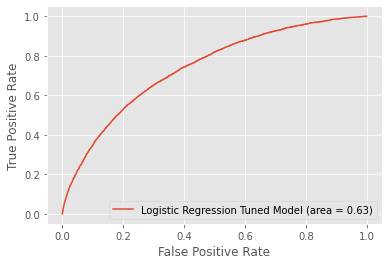

In [158]:
Log_ROC_auc = roc_auc_score(y_test, y_pred_lr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr[:, 1])

plt.figure()
plt.plot(fpr, tpr, label = "Logistic Regression Tuned Model (area = %0.2f)" % Log_ROC_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

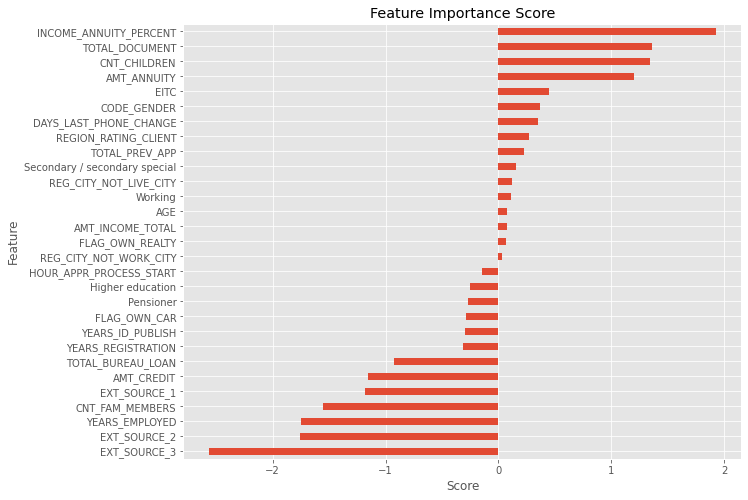

In [159]:
feat_importances = pd.Series(lr.coef_[0], index=X.columns)
ax = feat_importances.nlargest(32).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')
plt.show()

In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
params = {
            "objective": "binary:logitraw",
            'booster': 'gbtree',
            'n_estimators': 200,
            'max_depth' : 5, 
            'eta':  0.02465211760946184,
}

In [162]:
import xgboost as xgb

In [163]:
svc= xgb.XGBClassifier(**params) 
svc.fit(X_train, y_train)


y_pred_svc = svc.predict(X_test)

svc_train_score = svc.score(X_train, y_train)
svc_test_score= svc.score(X_test, y_test)
y_pred_proba_svc = svc.predict_proba(X_test)

svc_acc = accuracy_score(y_pred_svc,y_test)


print('XGBOOST Train Score is : ' , svc_train_score)
print('XGBOOST Test Score is : ' , svc_test_score)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBOOST Train Score is :  0.9372342997305408
XGBOOST Test Score is :  0.919662455489976


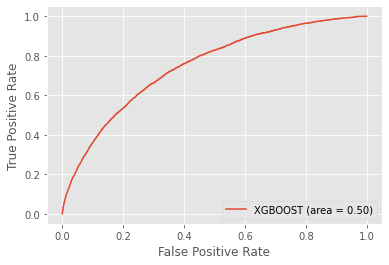

In [164]:
Log_ROC_auc = roc_auc_score(y_test, y_pred_svc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svc[:, 1])

plt.figure()
plt.plot(fpr, tpr, label = "XGBOOST (area = %0.2f)" % Log_ROC_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [165]:
from sklearn.ensemble import AdaBoostClassifier

In [166]:
ac= AdaBoostClassifier(n_estimators=300, random_state=0,learning_rate=0.1)
ac.fit(X_train, y_train)

y_pred_ac = ac.predict(X_test)

ac_train_score = ac.score(X_train, y_train)
ac_test_score= ac.score(X_test, y_test)
y_pred_proba_ac = ac.predict_proba(X_test)

ac_acc = accuracy_score(y_pred_ac,y_test)


print('RandomForestClassifier Train Score is : ' , ac_train_score)
print('RandomForestClassifier Test Score is : ' , ac_test_score)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomForestClassifier Train Score is :  0.8299252943708395
RandomForestClassifier Test Score is :  0.9074679283937369


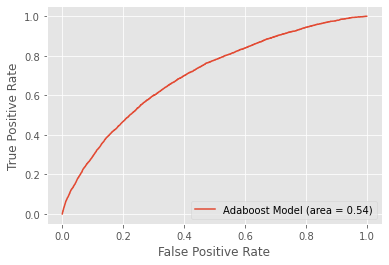

In [167]:
Log_ROC_auc = roc_auc_score(y_test, y_pred_ac)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_ac[:, 1])

plt.figure()
plt.plot(fpr, tpr, label = "Adaboost Model (area = %0.2f)" % Log_ROC_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()